In [ ]:
import torch
import pandas as pd
import os
import glob

## Make data df

In [ ]:

midi_files = glob.glob('/Users/kenton/Desktop/2008/*.midi')
wav_files = glob.glob('/Users/kenton/Desktop/2008/*.wav')
midi_files.sort()
wav_files.sort()
df = pd.DataFrame.from_dict({'midi_filename' :midi_files, 
                        'audio_filename': wav_files})

prefix = '/Users/kenton/Desktop/2008/'

df['midi_filename'] = df['midi_filename'].str.replace(prefix, '', regex=False)
df['audio_filename'] = df['audio_filename'].str.replace(prefix, '', regex=False)

df['year']=2008
df['split'] = 'train'
df.loc[127:, 'split'] = 'valid'
df.to_csv('data.csv')
df

,midi_filename,audio_filename,year,split
0,MIDI-Unprocessed_01_R1_2008_01-04_ORIG_MID--AU...,MIDI-Unprocessed_01_R1_2008_01-04_ORIG_MID--AU...,2008,train
1,MIDI-Unprocessed_01_R1_2008_01-04_ORIG_MID--AU...,MIDI-Unprocessed_01_R1_2008_01-04_ORIG_MID--AU...,2008,train
2,MIDI-Unprocessed_01_R1_2008_01-04_ORIG_MID--AU...,MIDI-Unprocessed_01_R1_2008_01-04_ORIG_MID--AU...,2008,train
3,MIDI-Unprocessed_02_R1_2008_01-05_ORIG_MID--AU...,MIDI-Unprocessed_02_R1_2008_01-05_ORIG_MID--AU...,2008,train
4,MIDI-Unprocessed_02_R1_2008_01-05_ORIG_MID--AU...,MIDI-Unprocessed_02_R1_2008_01-05_ORIG_MID--AU...,2008,train
...,...,...,...,...
142,MIDI-Unprocessed_17_R2_2008_01-04_ORIG_MID--AU...,MIDI-Unprocessed_17_R2_2008_01-04_ORIG_MID--AU...,2008,valid
143,MIDI-Unprocessed_17_R2_2008_01-04_ORIG_MID--AU...,MIDI-Unprocessed_17_R2_2008_01-04_ORIG_MID--AU...,2008,valid
144,MIDI-Unprocessed_18_R1_2008_01-04_ORIG_MID--AU...,MIDI-Unprocessed_18_R1_2008_01-04_ORIG_MID--AU...,2008,valid
145,MIDI-Unprocessed_18_R1_2008_01-04_ORIG_MID--AU...,MIDI-Unprocessed_18_R1_2008_01-04_ORIG_MID--AU...,2008,valid


## Visualise

In [ ]:
from muse.data import MaestroDataset, DataProcessor, messages_to_wav
dp = DataProcessor()
ds = MaestroDataset('/data/2008', '/data/2008/data.csv', dp)
x, y = dp.collate_fn([ds[0]])
print(x.shape, y.shape)

INFO:muse.data:Loading MIDI-Unprocessed_01_R1_2008_01-04_ORIG_MID--AUDIO_01_R1_2008_wav--1.midi.
INFO:muse.data:Ticks per beat384


torch.Size([4, 500, 512]) torch.Size([4, 212])


note_on channel=0 note=77 velocity=0 time=153
note_on channel=0 note=79 velocity=127 time=15
note_on channel=0 note=79 velocity=0 time=176
note_on channel=0 note=80 velocity=127 time=7
note_on channel=0 note=79 velocity=127 time=184
note_on channel=0 note=80 velocity=0 time=23
note_on channel=0 note=70 velocity=0 time=161
note_on channel=0 note=77 velocity=127 time=15
note_on channel=0 note=79 velocity=0 time=138
note_on channel=0 note=75 velocity=127 time=61
note_on channel=0 note=77 velocity=0 time=99
note_on channel=0 note=74 velocity=127 time=122
note_on channel=0 note=75 velocity=0 time=30
note_on channel=0 note=79 velocity=127 time=261
note_on channel=0 note=75 velocity=127 time=7
note_on channel=0 note=74 velocity=0 time=53
note_on channel=0 note=63 velocity=0 time=107
note_on channel=0 note=63 velocity=127 time=145
note_on channel=0 note=63 velocity=0 time=199
note_on channel=0 note=65 velocity=127 time=7
note_on channel=0 note=65 velocity=0 time=176
note_on channel=0 note=67 v

fluidsynth: error: fluid_is_soundfont(): fopen() failed: 'File does not exist.'
Parameter 'SGM-v2.01-NicePianosGuitarsBass-V1.2.sf2' not a SoundFont or MIDI file or error occurred identifying it.


FluidSynth runtime version 2.2.5
Copyright (C) 2000-2022 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.

Rendering audio to file '/root/musica/output/test.wav'..


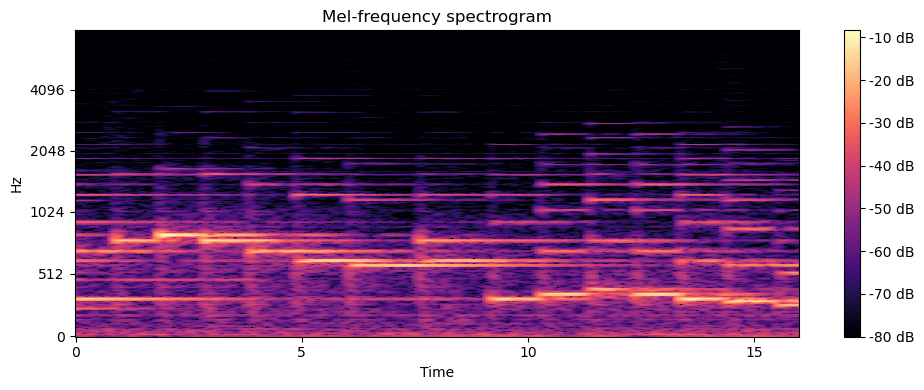

In [ ]:
import matplotlib.pyplot as plt
import librosa
from muse.data import MaestroDataset, DataProcessor
from muse.vis import messages_to_wav, plot_spectrogram_from_wav

plt.figure(figsize=(10, 4))
librosa.display.specshow(x[0].cpu().numpy().T, sr=16e3, x_axis='time', y_axis='mel', fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()

# This is for sanity checking the 
messages = dp.tok.res_to_messages(dp.tok.detokenise(y[0]))

for m in messages:
    print(m)

messages_to_wav(
        messages, tempo=500000, sample_rate=dp.ap.sampling_rate,
        ticks_per_beat=384, out_file='/root/musica/output/test.wav', soundfont_path = 'SGM-v2.01-NicePianosGuitarsBass-V1.2.sf2'
    )     



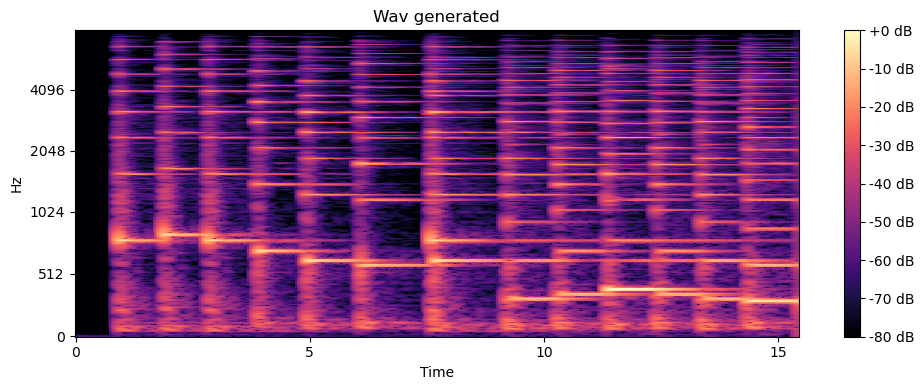

In [26]:
plot_spectrogram_from_wav('/root/musica/output/test.wav', show=False)
plt.title('Wav generated')
plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


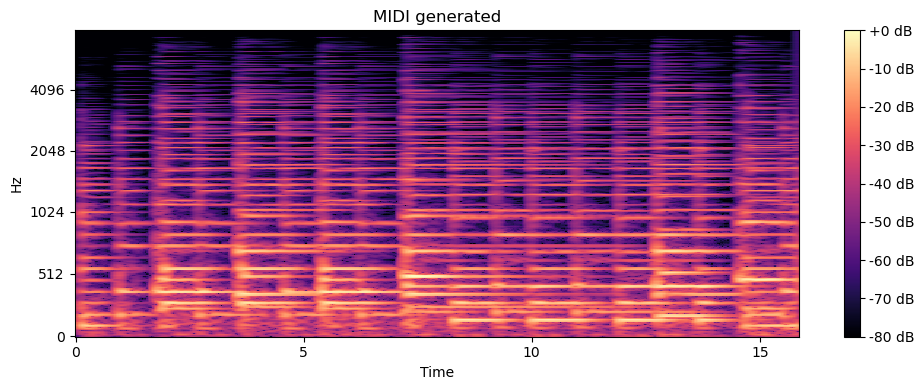

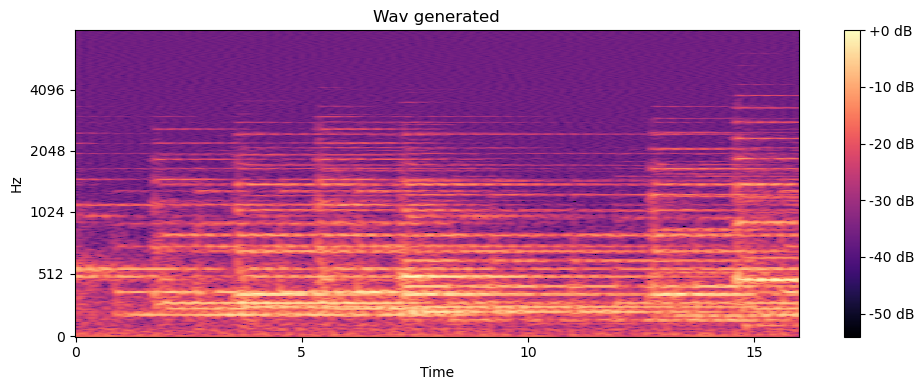

In [9]:
%load_ext autoreload
%autoreload 2

from muse.vis import plot_spectrogram_from_wav
import matplotlib.pyplot as plt


plot_spectrogram_from_wav('/root/musica/output/out.wav', show=False)
plt.title('MIDI generated')
plt.show()

plot_spectrogram_from_wav('/root/musica/output/spectrogram.wav', show=False)
plt.title('Wav generated')
plt.show()

## Evaluation

In [35]:
from muse.utils import get_device, get_wandb_checkpoint_path
from muse.model import MusicTranscriber, get_decoder_inputs_and_targets
from torch.utils.data import DataLoader
import torch

dp = DataProcessor(batch_size=1)

path_to_data_dir = '/data/2008'
path_to_csv = '/data/2008/data.csv'

train_ds = MaestroDataset(path_to_data_dir, path_to_csv, dp)
val_ds = MaestroDataset(path_to_data_dir, path_to_csv, dp, train=False)

model_config = {
    'd_model': 256,
    'enc_dims': dp.ap.n_mels,
    'enc_max_len': 512,
    'dec_max_len': dp.max_dec_len,
    'dec_vocab_size': dp.tok.vocab_size,
    'eos_id': dp.tok.eos_id,
    'bos_id': dp.tok.bos_id,
    'pad_id': dp.tok.pad_id,
}

checkpoint_path = get_wandb_checkpoint_path(
        'kwokkenton-individual/mlx-week5-music/transcriber-256:v37',
    )

# logger.info(f'Using saved model at {checkpoint_path}.')

device = get_device()

model = MusicTranscriber(model_config)

checkpoint = torch.load(
    checkpoint_path,
    map_location=device,
    weights_only=True,
)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)

x, y = dp.collate_fn([train_ds[0]])

# CHANGE THIS-------------------------------------------------------
# Training forward code
inputs, targets = get_decoder_inputs_and_targets(
    y,
    model.eos_id,
    model.pad_id,
)

# Scale input
x = (x + 40)/80

x = x.to(device)
inputs = inputs.to(device)
targets = targets.to(device)
# Scores are (unnormalised) logits
scores = model(x = x, 
                y = inputs)

# # Then do the loss
# loss = loss_fn(
#     scores.view(targets.numel(), -1),
#     targets.view(-1),
# )
scores.view(targets.numel(), -1)

   Unnamed: 0                                      midi_filename  \
0           0  MIDI-Unprocessed_01_R1_2008_01-04_ORIG_MID--AU...   

                                      audio_filename  year  split  
0  MIDI-Unprocessed_01_R1_2008_01-04_ORIG_MID--AU...  2008  train  
   Unnamed: 0                                      midi_filename  \
1           1  MIDI-Unprocessed_01_R1_2008_01-04_ORIG_MID--AU...   

                                      audio_filename  year  split  
1  MIDI-Unprocessed_01_R1_2008_01-04_ORIG_MID--AU...  2008  valid  


wandb: Downloading large artifact transcriber-256:v37, 212.34MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.7 (299.8MB/s)
/root/miniconda3/envs/musica-env/lib/python3.10/site-packages/torch/nn/modules/transformer.py:382: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


Using CUDA (GPU) backend.


INFO:muse.data:Loading MIDI-Unprocessed_01_R1_2008_01-04_ORIG_MID--AUDIO_01_R1_2008_wav--1.midi.
INFO:muse.data:Ticks per beat384
/root/miniconda3/envs/musica-env/lib/python3.10/site-packages/torch/nn/functional.py:5962: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
/root/miniconda3/envs/musica-env/lib/python3.10/site-packages/torch/nn/functional.py:5962: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


tensor([[-2.6575,  6.6981,  6.7688,  ..., -2.2376, -1.8515, -2.5530],
        [-6.1247, -0.4642, -0.3837,  ..., -6.3822, -1.3591, -5.7485],
        [-4.5034,  0.3383,  0.5573,  ..., -4.8167,  0.5573, -4.6918],
        ...,
        [-6.3935, -2.0534, -1.7802,  ..., -6.7624, -0.0131, -6.7855],
        [-4.6687, -0.5932,  0.0968,  ..., -4.3352,  0.5785, -4.5964],
        [-3.9441, -2.1717, -1.3302,  ..., -4.1231,  6.9703, -4.0165]],
       device='cuda:0', grad_fn=<ViewBackward0>)

In [ ]:
messages = dp.tok.res_to_messages(dp.tok.detokenise(scores.argmax(-1)[0][:-3]))

for m in messages:
    print(m)

AssertionError: Negative delta time detected: -15

In [65]:
res = dp.tok.detokenise(scores.argmax(-1)[0][:-3])

sorted_indices = torch.argsort(res[:, 0])

# Reorder tensor rows by those indices
sorted_tensor = res[sorted_indices]

messages = dp.tok.res_to_messages(sorted_tensor)
for m in messages:
    print(m)

messages_to_wav(
        messages, tempo=500000, sample_rate=dp.ap.sampling_rate,
        ticks_per_beat=384, out_file='/root/musica/output/model_output.wav', 
        soundfont_path = '/root/musica/SGM-v2.01-NicePianosGuitarsBass-V1.2.sf2'
    )     

messages = dp.tok.res_to_messages(dp.tok.detokenise(y[0][1:-1]))
for m in messages:
    print(m)

messages_to_wav(
        messages, tempo=500000, sample_rate=dp.ap.sampling_rate,
        ticks_per_beat=384, out_file='/root/musica/output/model_gt.wav', 
        soundfont_path = '/root/musica/SGM-v2.01-NicePianosGuitarsBass-V1.2.sf2'
    )  

note_on channel=0 note=67 velocity=0 time=15
note_on channel=0 note=68 velocity=127 time=145
note_on channel=0 note=68 velocity=0 time=0
note_on channel=0 note=67 velocity=0 time=345
note_on channel=0 note=67 velocity=0 time=7
note_on channel=0 note=65 velocity=127 time=7
note_on channel=0 note=63 velocity=127 time=76
note_on channel=0 note=63 velocity=127 time=161
note_on channel=0 note=63 velocity=127 time=145
note_on channel=0 note=55 velocity=0 time=122
note_on channel=0 note=73 velocity=127 time=46
note_on channel=0 note=55 velocity=0 time=476
note_on channel=0 note=56 velocity=0 time=130
note_on channel=0 note=56 velocity=127 time=84
note_on channel=0 note=56 velocity=0 time=53
note_on channel=0 note=56 velocity=0 time=115
note_on channel=0 note=56 velocity=0 time=207
note_on channel=0 note=56 velocity=127 time=38
note_on channel=0 note=56 velocity=127 time=7
note_on channel=0 note=53 velocity=127 time=0
note_on channel=0 note=56 velocity=0 time=99
note_on channel=0 note=53 veloc

In [40]:
scores.argmax(-1)[0]

tensor([   2, 1067, 1128,   21, 1068, 1128,   21, 1068, 1255,   67, 1067, 1128,
          68, 1065, 1255,   66, 1067, 1128,   78, 1063, 1255,   99, 1063, 1255,
         118, 1063, 1255,  140, 1073, 1255,  134, 1055, 1128,  202, 1055, 1128,
         219, 1056, 1128,  230, 1056, 1255,  237, 1056, 1128,  252, 1056, 1128,
         285, 1056, 1255,  279, 1056, 1128,  298, 1056, 1128,  285, 1053, 1255,
         284, 1056, 1255,  311, 1053, 1128,  321, 1053, 1128,  354, 1051, 1255,
         343, 1055, 1255,  361, 1056, 1255, 1257, 1055, 1255, 1257],
       device='cuda:0')

In [ ]:
    midi_files[0].split('/')

In [ ]:
print(mirdata.list_datasets())
maestro = mirdata.initialize('maestro', data_home='/root/musica/data')

MIDI files

In [72]:
import mido
midi_path = '/Users/kenton/Desktop/2008/MIDI-Unprocessed_01_R1_2008_01-04_ORIG_MID--AUDIO_01_R1_2008_wav--1.midi'
wav_path = '/Users/kenton/Desktop/2008/MIDI-Unprocessed_01_R1_2008_01-04_ORIG_MID--AUDIO_01_R1_2008_wav--1.wav'


# Load the MIDI file
midi_file = mido.MidiFile(midi_path)

# Iterate through the messages in the file
for i, track in enumerate(midi_file.tracks):
    print(f"Track {i}: {track.name}")
    for msg in track:
        print(msg)

Track 0: 
MetaMessage('set_tempo', tempo=500000, time=0)
MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0)
MetaMessage('end_of_track', time=1)
Track 1: Cui05-08.mid
MetaMessage('track_name', name='Cui05-08.mid', time=0)
program_change channel=0 program=0 time=0
control_change channel=0 control=67 value=11 time=370
control_change channel=0 control=67 value=22 time=15
control_change channel=0 control=67 value=36 time=15
control_change channel=0 control=67 value=51 time=16
control_change channel=0 control=67 value=64 time=14
control_change channel=0 control=67 value=79 time=15
control_change channel=0 control=67 value=90 time=16
control_change channel=0 control=67 value=101 time=14
control_change channel=0 control=67 value=110 time=16
control_change channel=0 control=67 value=118 time=15
control_change channel=0 control=67 value=126 time=15
control_change channel=0 control=67 value=127 time=16
note_on channel=0 note=51 ve

In [66]:
midi_file.ticks_per_beat

384

In [71]:
track[200].tempo

AttributeError: 'Message' object has no attribute 'tempo'

In [1]:
import torchaudio
example_melody = example_track.audio_path

# Load audio
waveform, sample_rate = torchaudio.load(example_track.audio_path)

NameError: name 'example_track' is not defined

In [ ]:
import mido


Track 0: 
MetaMessage('set_tempo', tempo=500000, time=0)
MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0)
MetaMessage('end_of_track', time=1)
Track 1: Cui05-08.mid
MetaMessage('track_name', name='Cui05-08.mid', time=0)
program_change channel=0 program=0 time=0
control_change channel=0 control=67 value=11 time=370
control_change channel=0 control=67 value=22 time=15
control_change channel=0 control=67 value=36 time=15
control_change channel=0 control=67 value=51 time=16
control_change channel=0 control=67 value=64 time=14
control_change channel=0 control=67 value=79 time=15
control_change channel=0 control=67 value=90 time=16
control_change channel=0 control=67 value=101 time=14
control_change channel=0 control=67 value=110 time=16
control_change channel=0 control=67 value=118 time=15
control_change channel=0 control=67 value=126 time=15
control_change channel=0 control=67 value=127 time=16
note_on channel=0 note=51 ve

In [78]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

sample_rate = 44.1e3
n_fft = 2048
hop_length = 128
n_mels = 256
y, sr = librosa.load(wav_path, sr = None, mono=True)
# sr = 16000 # Hz
target_sr = 16e3
y = librosa.resample(y, orig_sr=sample_rate, target_sr=target_sr)

# Compute mel spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft = n_fft, hop_length=hop_length, n_mels=n_mels, fmax=8000)

# Convert to decibels (log scale)
S_dB = librosa.power_to_db(S, ref=np.max)

In [51]:
# y, sr = librosa.load(wav_path, sr = sample_rate)
duration = librosa.get_duration(y=y, sr=sr)
duration

343.97748299319727

In [54]:
import soundfile as sf

info = sf.info(wav_path)
print(info)

/root/musica/data/2008/MIDI-Unprocessed_01_R1_2008_01-04_ORIG_MID--AUDIO_01_R1_2008_wav--1.wav
samplerate: 44100 Hz
channels: 2
duration: 05:43.977 min
format: WAV (Microsoft) [WAV]
subtype: Signed 16 bit PCM [PCM_16]


In [47]:
# Plot it
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

In [26]:
S_dB.shape

(256, 42998)

In [27]:
42998/sr

2.687375

In [19]:
sr

44100.0

In [83]:
for i, track in enumerate(midi_file.tracks):
    print(f"Track {i}: {track.name}")
    for msg in track:
        print(msg)


Track 0: 
MetaMessage('set_tempo', tempo=500000, time=0)
MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0)
MetaMessage('end_of_track', time=1)
Track 1: Cui05-08.mid
MetaMessage('track_name', name='Cui05-08.mid', time=0)
program_change channel=0 program=0 time=0
control_change channel=0 control=67 value=11 time=370
control_change channel=0 control=67 value=22 time=15
control_change channel=0 control=67 value=36 time=15
control_change channel=0 control=67 value=51 time=16
control_change channel=0 control=67 value=64 time=14
control_change channel=0 control=67 value=79 time=15
control_change channel=0 control=67 value=90 time=16
control_change channel=0 control=67 value=101 time=14
control_change channel=0 control=67 value=110 time=16
control_change channel=0 control=67 value=118 time=15
control_change channel=0 control=67 value=126 time=15
control_change channel=0 control=67 value=127 time=16
note_on channel=0 note=51 ve

In [92]:
midi_file.tracks[1][10].type

'control_change'

In [ ]:
from miditok import MIDILike, TokenizerConfig
from symusic import Score

tokenizer = MIDILike(TokenizerConfig())

# Creating a multitrack tokenizer, read the doc to explore all the parameters
config = TokenizerConfig(num_velocities=16, use_chords=True, use_programs=True)
tokenizer = MIDILike(config)

# Loads a midi, converts to tokens, and back to a MIDI
midi = Score(example_track.midi_path)
tokens = tokenizer(midi)  # calling the tokenizer will automatically detect MIDIs, paths and tokens
converted_back_midi = tokenizer(tokens)  

/tmp/ipykernel_9199/1623911266.py:7: UserWarning: Attribute controls are not compatible with 'config.one_token_stream_for_programs' and multi-vocabulary tokenizers. Disabling them from the config.
  tokenizer = MIDILike(config)


In [55]:
from mido import Message

class Tokeniser:
    def __init__(self, ):
        self.time_ms_max  = 60000
        self.time_max  = 6000

        self.velocity_max = 128
        self.note_max = 128
    
    @staticmethod
    def process_midi(midi):
        # In: Librosa midi file
        times = []
        msgs = []
        for i, track in enumerate(midi.tracks):
            abs_time = 0

            # remove initial track
            if i ==0:
                continue

            for msg in track:
                abs_time += msg.time
                if msg.type in ['note_on', 'note_off']:
                    msgs.append(msg)
                    times.append(abs_time)
                else:
                    continue

        times=  torch.tensor(times)
        return times, msgs
    
    @staticmethod
    def collect_indices_between(times, start_time, end_time):
        return [i for i, t in enumerate(times) if start_time <= t <= end_time] 

    @staticmethod
    def get_midi_between(midi, start_index=None, end_index=None, start_time=None, end_time=None):
        times, msgs = Tokeniser.process_midi(midi)

        if (start_index is not None) and (end_index is not None):
            if end_index > len(times) - 1:
                raise ValueError
            idxs = [start_index, end_index]
        elif (start_time is not None) and (end_time is not None):
            idxs = Tokeniser.collect_indices_between(times, start_time, end_time)
        else: 
            raise ValueError(f'Start_index:{start_index}')
        return times[idxs[0]:idxs[-1]], msgs[idxs[0]:idxs[-1]]
    
    def tokenise_midi(self, time_ms, velocity, note):

        assert time_ms >= 0 and time_ms < self.time_ms_max
        assert velocity >= 0 and velocity < self.velocity_max
        assert note >0 and note < self.note_max
        # To nearest 10 ms
        time = time_ms // 10
        return torch.tensor([time, self.time_max + velocity, self.time_max + self.velocity_max + note], dtype=torch.int32)
    
    def process_chunk(self, times, msgs):
        t0 = times[0]
        chunk = torch.tensor([], dtype=torch.int16)
        for t, m in zip(times, msgs):
            chunk = torch.cat([chunk, self.tokenise_midi(t-t0, m.velocity, m.note)])
        return chunk
    
    def detokenise_midi(self, token_sequence, start_time_ms = 0):
        """
        Convert a flat token sequence into a list of MIDI messages and times.
        token_sequence: 1D tensor of shape (N,) where N is a multiple of 3.
        Returns: list of (absolute_time_ms, mido.Message)
        """
        assert token_sequence.ndim == 1 and token_sequence.size(0) % 3 == 0

        messages = []
        time_ms = 0
        velocity = 64  # Default velocity
        prev_time_ms = 0
        for i in range(0, len(token_sequence), 3):
            t_token = token_sequence[i].item()
            v_token = token_sequence[i + 1].item()
            n_token = token_sequence[i + 2].item()

            # Decode absolute time (quantized to 10ms)
            time_ms = t_token * 10

            # Decode velocity
            velocity = v_token - self.time_max
            if velocity < 0 or velocity >= self.velocity_max:
                raise ValueError(f"Invalid velocity token: {v_token}")

            # Decode note
            note = n_token - self.time_max - self.velocity_max
            if note <= 0 or note >= self.note_max:
                raise ValueError(f"Invalid note token: {n_token}")

            # Determine message type
     
            msg = Message('note_on', note=note, velocity=velocity, time=time_ms - prev_time_ms)
            prev_time_ms = time_ms

            messages.append((int(start_time_ms + time_ms), msg))

        return messages

    
tok = Tokeniser()
# times, msgs = tok.get_midi_between(midi_file, start_time=10000, end_time = 20000)
times, msgs = tok.get_midi_between(midi_file, start_index=500, end_index = 1024)
times, msgs

(tensor([47005, 47057, 47477, 47530, 47532, 47534, 47576, 47616, 48040, 48066,
         48072, 48101, 48105, 48106, 48154, 48206, 48349, 48360, 48623, 48629,
         48632, 48632, 48653, 48684, 48907, 48913, 49209, 49210, 49219, 49221,
         49229, 49258, 49270, 49276, 49786, 49800, 49809, 49814, 49824, 49854,
         50370, 50377, 50388, 50388, 50392, 50394, 50952, 50971, 50978, 50979,
         51407, 51493, 51530, 51533, 51555, 51783, 51799, 51814, 52101, 52111,
         52111, 52397, 52417, 52674, 52680, 52681, 52970, 52987, 53279, 53282,
         53308, 53316, 53493, 53498, 53839, 53844, 54105, 54110, 54127, 54138,
         54216, 54429, 54431, 54438, 54440, 54461, 54652, 54656, 54676, 54981,
         54995, 54997, 55277, 55281, 55550, 55550, 55554, 55567, 55568, 55811,
         55824, 55832, 56100, 56128, 56154, 56159, 56292, 56363, 56421, 56421,
         56440, 56498, 56510, 56550, 56653, 56724, 56733, 56747, 56755, 57125,
         57287, 57305, 57310, 57315, 57324, 57602, 5

In [57]:
tok.process_chunk(times, msgs)

tensor([   0, 6000, 6204,  ..., 3566, 6092, 6205], dtype=torch.int32)

In [56]:
tok.detokenise_midi(tok.process_chunk(times, msgs), times[0])

[(47005, Message('note_on', channel=0, note=76, velocity=0, time=0)),
 (47055, Message('note_on', channel=0, note=67, velocity=0, time=50)),
 (47475, Message('note_on', channel=0, note=56, velocity=0, time=420)),
 (47525, Message('note_on', channel=0, note=62, velocity=52, time=50)),
 (47525, Message('note_on', channel=0, note=71, velocity=58, time=0)),
 (47525, Message('note_on', channel=0, note=55, velocity=45, time=0)),
 (47575, Message('note_on', channel=0, note=72, velocity=0, time=50)),
 (47615, Message('note_on', channel=0, note=60, velocity=0, time=40)),
 (48035, Message('note_on', channel=0, note=62, velocity=0, time=420)),
 (48065, Message('note_on', channel=0, note=60, velocity=52, time=30)),
 (48065, Message('note_on', channel=0, note=63, velocity=49, time=0)),
 (48095, Message('note_on', channel=0, note=75, velocity=69, time=30)),
 (48105, Message('note_on', channel=0, note=72, velocity=57, time=10)),
 (48105, Message('note_on', channel=0, note=55, velocity=0, time=0)),
 (

In [104]:
import pandas as pd
df = pd.read_csv('/root/musica/data/maestro-v2.0.0.csv')
df = df[df['year'].isin([2008, 2009, 2011, 2014])]

In [76]:
maestro.df

,canonical_composer,canonical_title,split,year,midi_filename,audio_filename,duration
1,Alban Berg,Sonata Op. 1,train,2008,2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...,2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...,759.518471
5,Alexander Scriabin,"5 Preludes, Op.15",validation,2009,2009/MIDI-Unprocessed_07_R1_2009_04-05_ORIG_MI...,2009/MIDI-Unprocessed_07_R1_2009_04-05_ORIG_MI...,400.557826
6,Alexander Scriabin,"Entragete, Op.63",test,2009,2009/MIDI-Unprocessed_11_R1_2009_06-09_ORIG_MI...,2009/MIDI-Unprocessed_11_R1_2009_06-09_ORIG_MI...,163.745830
8,Alexander Scriabin,"Etude Op. 42, Nos. 4 & 5",test,2009,2009/MIDI-Unprocessed_02_R1_2009_03-06_ORIG_MI...,2009/MIDI-Unprocessed_02_R1_2009_03-06_ORIG_MI...,136.315302
9,Alexander Scriabin,"Etude Op. 8, No. 13",validation,2009,2009/MIDI-Unprocessed_02_R1_2009_03-06_ORIG_MI...,2009/MIDI-Unprocessed_02_R1_2009_03-06_ORIG_MI...,167.085837
...,...,...,...,...,...,...,...
1264,Wolfgang Amadeus Mozart,"Sonata in D Major, K. 284, First Movement",train,2011,2011/MIDI-Unprocessed_03_R1_2011_MID--AUDIO_R1...,2011/MIDI-Unprocessed_03_R1_2011_MID--AUDIO_R1...,205.236173
1265,Wolfgang Amadeus Mozart,"Sonata in D Major, K. 311",train,2009,2009/MIDI-Unprocessed_14_R1_2009_06-08_ORIG_MI...,2009/MIDI-Unprocessed_14_R1_2009_06-08_ORIG_MI...,910.278203
1266,Wolfgang Amadeus Mozart,"Sonata in D Major, K. 576 (Complete)",train,2014,2014/MIDI-UNPROCESSED_09-10_R1_2014_MID--AUDIO...,2014/MIDI-UNPROCESSED_09-10_R1_2014_MID--AUDIO...,790.820523
1269,Wolfgang Amadeus Mozart,"Sonata in D Major, K.311",train,2009,2009/MIDI-Unprocessed_05_R1_2009_01-02_ORIG_MI...,2009/MIDI-Unprocessed_05_R1_2009_01-02_ORIG_MI...,792.420415
